In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
from performance_utils import get_scores
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

wv = pd.read_csv('data/word2vec_100.csv')
sg = pd.read_csv('data/skipgram_100.csv')
ft = pd.read_csv('data/fasttext_100.csv')

In [6]:
scores_data = []

# Using XGBoost

### CBOW

{'xgb__max_delta_step': 4, 'xgb__max_depth': 9, 'xgb__subsample': 0.5}
- Train Accuracy: 0.9750050726727112
- Train Precision: 0.9994054696789536
- Train Recall: 0.9717898413908893
- Train F1 Score: 0.9854042137888241

- Test Accuracy: 0.9066424604869714
- Test Precision: 0.9552298735193736
- Test Recall: 0.9363607291333547
- Test F1 Score: 0.9457011888346439


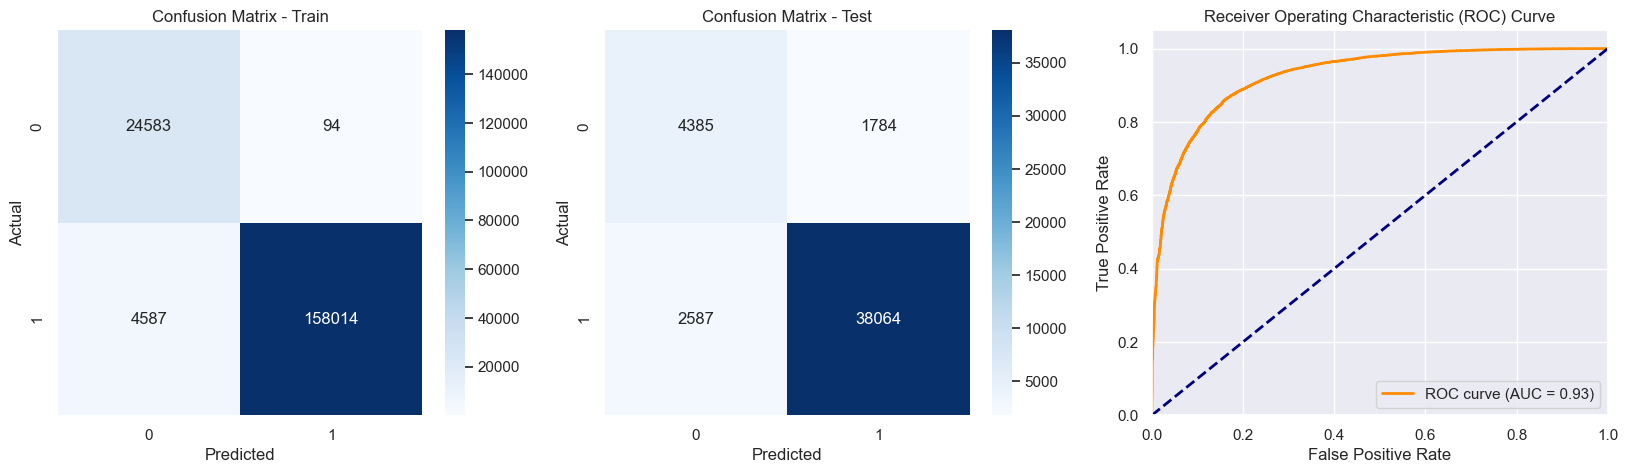

<Figure size 800x600 with 0 Axes>

In [7]:
# Separate features and target
X = wv.drop(['overall','reviewText', 'preprocessed_text', 'embeddings'], axis = 1)
y = wv['overall']

# Define the parameter grid for XGBClassifier
param_grid = {
    'xgb__max_depth': [6, 9],
    'xgb__max_delta_step': [4, 6],
    'xgb__subsample': [0.5],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with train_test_split and XGBClassifier
pipeline = Pipeline([
    #Dimension reduction step if we use it.
    ('xgb', XGBClassifier(random_state = 42, eval_metric='auc', scale_pos_weight = 0.15176234428197508))])

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_

print(best_params)
best_estimator = grid_search.best_estimator_

scores_data.append(['XGBoost', 'CBOW'] + get_scores(best_estimator, X_train, y_train, X_test, y_test))


### Skipgram

{'xgb__max_delta_step': 4, 'xgb__max_depth': 9, 'xgb__subsample': 0.5}
- Train Accuracy: 0.9757312658187294
- Train Precision: 0.9994754206115458
- Train Recall: 0.9725585943505882
- Train F1 Score: 0.985833309955957

- Test Accuracy: 0.9067278940623665
- Test Precision: 0.9546639266202195
- Test Recall: 0.9370741187178667
- Test F1 Score: 0.9457872456643452


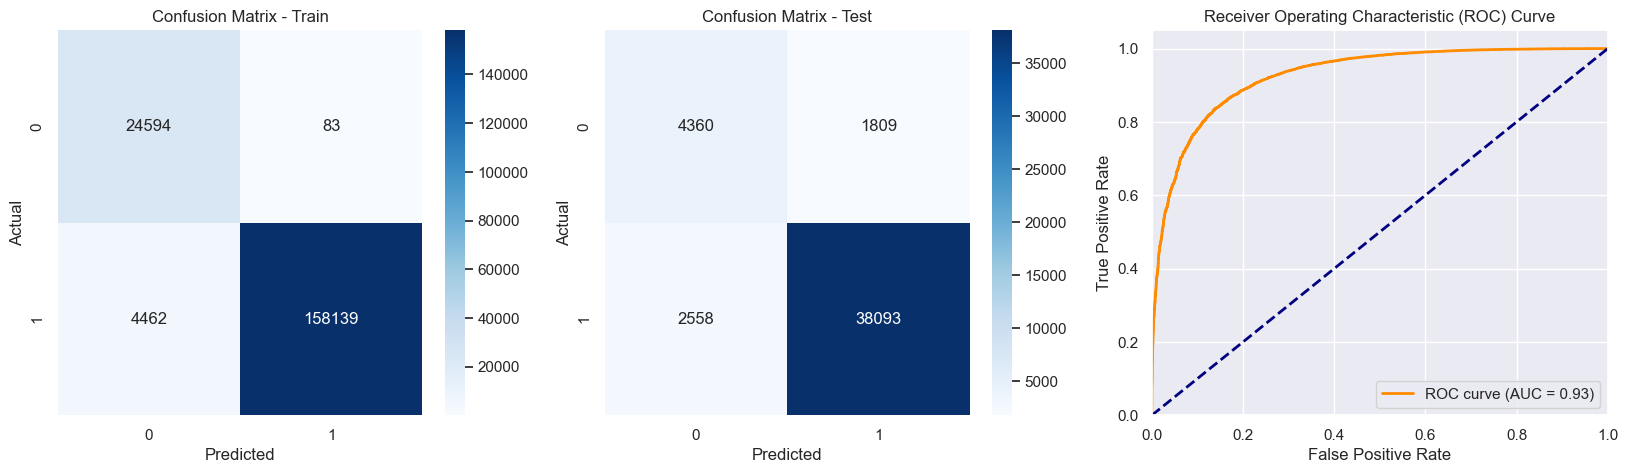

<Figure size 800x600 with 0 Axes>

In [8]:
# Separate features and target
X = sg.drop(['overall','reviewText', 'preprocessed_text', 'embeddings'], axis = 1)
y = sg['overall']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Define the parameter grid for XGBClassifier
param_grid = {
    'xgb__max_depth': [6, 9],
    'xgb__max_delta_step': [4, 6],
    'xgb__subsample': [0.5]
}


# Create a pipeline with train_test_split and XGBClassifier
pipeline = Pipeline([
    #Dimension reduction step if we use it.
    ('xgb', XGBClassifier(random_state = 42, eval_metric='auc', scale_pos_weight = 0.15176234428197508))])

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_

print(best_params)
best_estimator = grid_search.best_estimator_

scores_data.append(['XGBoost', 'Skipgram'] + get_scores(best_estimator, X_train, y_train, X_test, y_test))


### Fasttext

{'xgb__max_delta_step': 4, 'xgb__max_depth': 9, 'xgb__subsample': 0.5}
- Train Accuracy: 0.977023462446203
- Train Precision: 0.9995771056352252
- Train Recall: 0.9739484997017238
- Train F1 Score: 0.9865963935171773

- Test Accuracy: 0.9086501495087569
- Test Precision: 0.9550845761185066
- Test Recall: 0.9389436914221052
- Test F1 Score: 0.9469453575637289


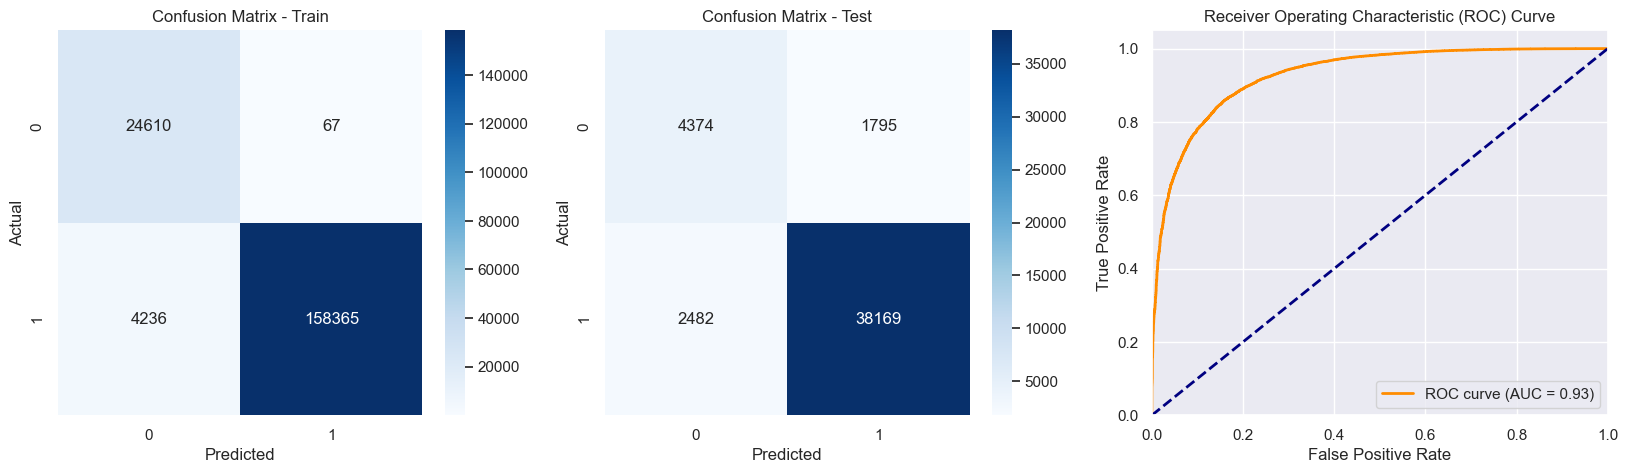

<Figure size 800x600 with 0 Axes>

In [9]:

# Separate features and target
X = ft.drop(['overall','reviewText', 'preprocessed_text', 'embeddings'], axis = 1)
y = ft['overall']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Define the parameter grid for XGBClassifier
param_grid = {
    'xgb__max_depth': [6, 9],
    'xgb__max_delta_step': [4, 6],
    'xgb__subsample': [0.5]
}


# Create a pipeline with train_test_split and XGBClassifier
pipeline = Pipeline([
    #Dimension reduction step if we use it.
    ('xgb', XGBClassifier(random_state = 42, eval_metric='auc', scale_pos_weight = 0.15176234428197508))])

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_

print(best_params)
best_estimator = grid_search.best_estimator_

scores_data.append(['XGBoost', 'Fasttext'] + get_scores(best_estimator, X_train, y_train, X_test, y_test))


In [11]:
scores = pd.DataFrame(data = scores_data, columns = ['model', 'embedding','accuracy','precision','recall','f1 score','roc auc'])
scores

,model,embedding,accuracy,precision,recall,f1 score,roc auc
0,XGBoost,CBOW,0.906642,0.955230,0.936361,0.945701,0.926628
1,XGBoost,Skipgram,0.906728,0.954664,0.937074,0.945787,0.926486
2,XGBoost,Fasttext,0.908650,0.955085,0.938944,0.946945,0.928219


In [13]:
scores.to_csv('data/XGBoost_performance.csv', index = False)